### Import the libraries

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense,Conv2D, MaxPool2D, Flatten, Dropout
from keras.utils import to_categorical, plot_model

2024-06-20 15:40:59.816846: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-20 15:40:59.892980: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-20 15:40:59.893019: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-20 15:40:59.923899: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-20 15:40:59.946699: I tensorflow/core/platform/cpu_feature_guar

Build the CNN Model

In [4]:
def build_cnn(input_shape=(224,224, 3), num_classes = 10):
    model = Sequential()

    # First Convolutional layer
    model.add(Conv2D(filters=32, input_shape=input_shape, kernel_size=(3,3),
                    activation='relu'))

    # First Pooling Layer
    model.add(MaxPool2D(pool_size=(2,2)))

    # Second Convolutional layer
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

    # Second Pooling Layer
    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(num_classes, activation="softmax")) #softmax best for multiclass
    return model

In [6]:
model = build_cnn(input_shape=(64,64, 3))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dense_1 (Dense)             (None, 10)               

### Create image data generator object

In [7]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1/255)

### Read the images

In [13]:
train = train_datagen.flow_from_directory('/home/pgdai/Desktop/March24-DAI-Workspace/CV-June24/dataset/imagenet-new/train',
                                          target_size=(64, 64),
                                          batch_size=32,
                                          class_mode='categorical')

Found 5000 images belonging to 10 classes.


In [10]:
train.filenames

['crocodile/images/n01698640_0.JPEG',
 'crocodile/images/n01698640_1.JPEG',
 'crocodile/images/n01698640_10.JPEG',
 'crocodile/images/n01698640_100.JPEG',
 'crocodile/images/n01698640_101.JPEG',
 'crocodile/images/n01698640_102.JPEG',
 'crocodile/images/n01698640_103.JPEG',
 'crocodile/images/n01698640_104.JPEG',
 'crocodile/images/n01698640_105.JPEG',
 'crocodile/images/n01698640_106.JPEG',
 'crocodile/images/n01698640_107.JPEG',
 'crocodile/images/n01698640_108.JPEG',
 'crocodile/images/n01698640_109.JPEG',
 'crocodile/images/n01698640_11.JPEG',
 'crocodile/images/n01698640_110.JPEG',
 'crocodile/images/n01698640_111.JPEG',
 'crocodile/images/n01698640_112.JPEG',
 'crocodile/images/n01698640_113.JPEG',
 'crocodile/images/n01698640_114.JPEG',
 'crocodile/images/n01698640_115.JPEG',
 'crocodile/images/n01698640_116.JPEG',
 'crocodile/images/n01698640_117.JPEG',
 'crocodile/images/n01698640_118.JPEG',
 'crocodile/images/n01698640_119.JPEG',
 'crocodile/images/n01698640_12.JPEG',
 'croco

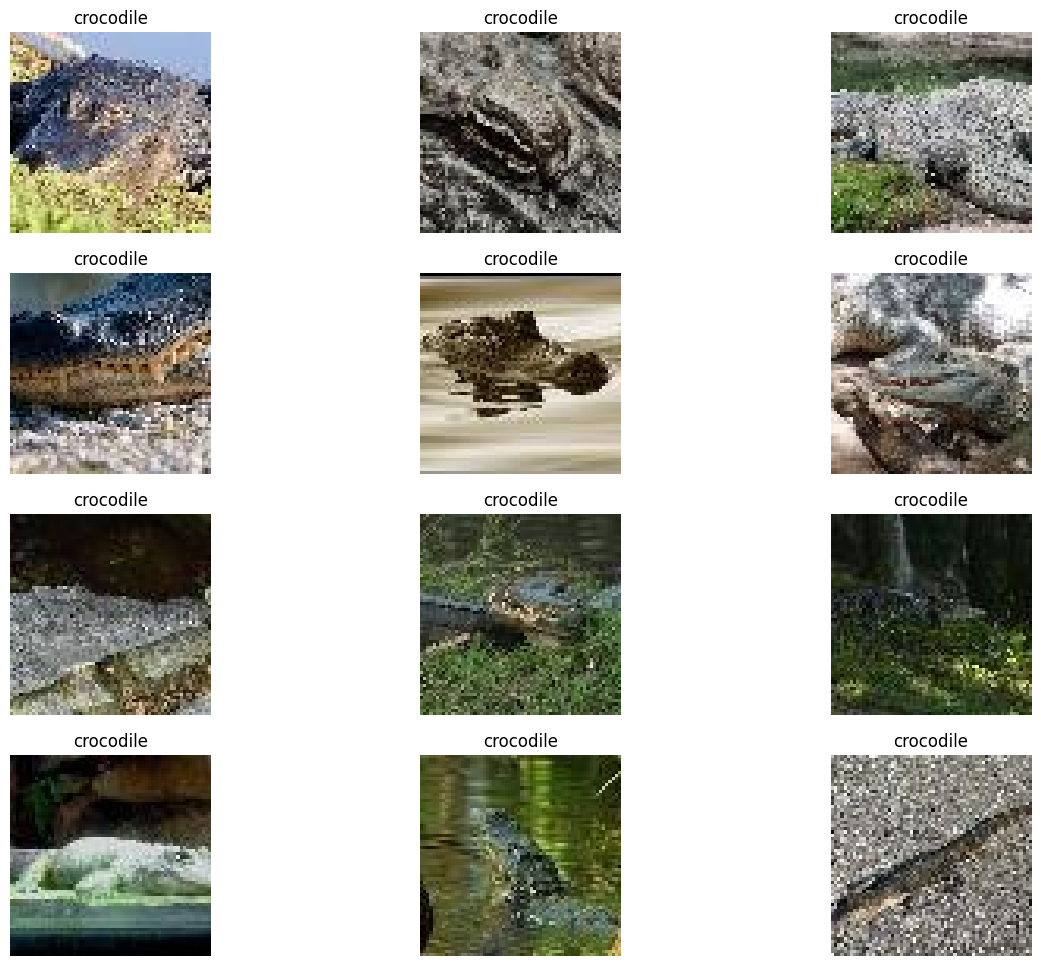

In [12]:
i = 1
plt.figure(figsize=(15,12))
for fname in train.filenames:
    if i == 13:
        break
    img = plt.imread(train.directory + "/"+fname)
    plt.subplot(4, 3, i)
    plt.axis('off')
    i += 1
    plt.title(fname.split('/')[0])
    plt.imshow(img)

In [11]:
test = test_datagen.flow_from_directory('/home/pgdai/Desktop/March24-DAI-Workspace/CV-June24/dataset/imagenet-new/test',
                                          target_size=(64, 64),
                                          class_mode='binary')

Found 10000 images belonging to 1 classes.


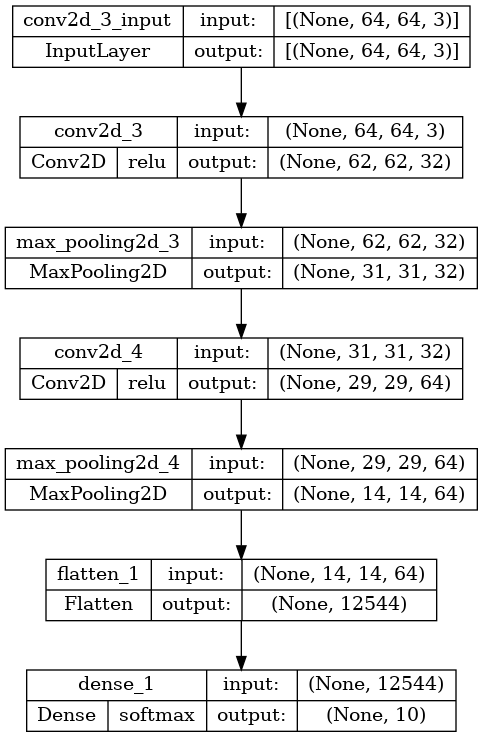

In [14]:
plot_model(model, show_layer_activations=True, show_layer_names=True, show_shapes=True)


In [16]:
train.class_indices

{'crocodile': 0,
 'fish': 1,
 'fossils': 2,
 'frog': 3,
 'insect': 4,
 'reptiles': 5,
 'scorpion': 6,
 'snake': 7,
 'spider': 8,
 'toad': 9}

Compile the model

In [19]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

Train the model

In [21]:
model.fit(train, epochs = 10)

Epoch 1/10
157/157 [==============================] - 12s 73ms/step - loss: 1.5793 - accuracy: 0.4546
Epoch 2/10
157/157 [==============================] - 11s 72ms/step - loss: 1.4828 - accuracy: 0.4924
Epoch 3/10
157/157 [==============================] - 11s 73ms/step - loss: 1.3817 - accuracy: 0.5308
Epoch 4/10
157/157 [==============================] - 11s 72ms/step - loss: 1.3205 - accuracy: 0.5556
Epoch 5/10
157/157 [==============================] - 11s 72ms/step - loss: 1.2665 - accuracy: 0.5716
Epoch 6/10
157/157 [==============================] - 11s 73ms/step - loss: 1.2085 - accuracy: 0.5886
Epoch 7/10
157/157 [==============================] - 11s 71ms/step - loss: 1.1672 - accuracy: 0.5994
Epoch 8/10
157/157 [==============================] - 12s 73ms/step - loss: 1.1208 - accuracy: 0.6266
Epoch 9/10
157/157 [==============================] - 11s 73ms/step - loss: 1.0992 - accuracy: 0.6280
Epoch 10/10
157/157 [==============================] - 11s 71ms/step - loss: 1.049

Predict the class of unseen Data

In [ ]:
import cv2
img = plt.imread("/home/pgdai/Desktop/March24-DAI-Workspace/CV-June24/dataset/fruits/sample1.jpg")